### *APPLICATION OF MACHINE LEARNING IN BIOLOGICAL SYSTEMS (ES60011)*
# **Project-4**
####  Back Propagation Neural Network

In [7]:
## NN

# Import the necessary libraries
import numpy as np

# define the class
class NN:

  def __init__(self, input_layer_size = 2, hidden_layer_size = 2, output_layer_size = 2, lr = 0.5, epoches = 1000):  # define the constructor
    self.input_layer_size = input_layer_size
    self.hidden_layer_size = hidden_layer_size
    self.output_layer_size = output_layer_size
    self.lr = lr
    self.number_of_epoches = epoches

    #initialize the weights
    #1. by random numbers
    self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
    self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
    # print(f'W1 = {self.W1}')
    # print(f'W2 = {self.W2}')

    #2. with zeros
    # self.W1 = np.zeros((self.input_layer_size, self.hidden_layer_size))
    # self.W2 = np.zeros((self.hidden_layer_size, self.output_layer_size))
    # print(f'W1 = {self.W1}')
    # print(f'W2 = {self.W2}')

    #3. specific numbers
    # self.W1 = np.array([[0.15, 0.25], [0.20, 0.30]])  # ([[w1, w3], [w2, w4]])
    # self.W2 = np.array([[0.40, 0.50], [0.45, 0.55]])
    # print(f'W1 = \n{self.W1}')
    # print(f'W2 = \n{self.W2}')

    # bias
    self.b1 = 0.35
    self.b2 = 0.60

  # define the activation function
  def activation(self, x):
    return (1 / (1 + np.exp(-x)))

  # forward pass
  def forward(self, X):
    self.hidden = self.activation(np.dot(X, self.W1) + self.b1)  # H = activation(X*W1 + b)
    self.output = self.activation(np.dot(self.hidden, self.W2) + self.b2)  # OP = activation(H*W2 + b)

    # print(f'H = {self.hidden}')
    # print(f'OP = {self.output}')
    return self.output

  # back propagation
  def back_prop(self, X, y):
    output = self.forward(X)
    error = np.sum((y - output)**2/2)
    # print(f'Error = {error}')
    self.W2 -= self.lr * (np.dot(self.hidden.T, np.multiply(-(y - output), output * (1 - output)))) # W2 = W2 - alpha * (H * ((y-OP) * (OP * (OP - 1))))
    # print(f'New W2 Weights: {self.W2}')

    self.W1 -= self.lr * (np.dot(X.T, np.dot(np.multiply(-(y - output), output * (1 - output)), self.W2.T) * self.hidden * (1 - self.hidden)))
    # print(f'New W1 Weights: {self.W1}')

    self.b1 -= self.lr * np.sum(np.dot(np.multiply(-(y - output), output * (1 - output)), self.W2.T) * self.hidden * (1 - self.hidden))
    # print(f'New b1 Weights: {self.b1}')

    self.b2 -= self.lr * np.sum(np.multiply(-(y - output), output * (1 - output)))
    # print(f'New b2 Weights: {self.b2}')

    return error

  # training; update the weights for the given number of epoches
  def train(self, X, y):
    loss = []
    for _ in range(self.number_of_epoches):
      e = self.back_prop(X, y)
      loss.append(e)
    return loss


In [8]:

# difference between np.dot and np.multiply

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print(f'np.dot = \n', np.dot(a, b))
print(f'np.multiply = \n', np.multiply(a, b))



np.dot = 
 [[19 22]
 [43 50]]
np.multiply = 
 [[ 5 12]
 [21 32]]


In [9]:

# Dataset
import pandas as pd
import numpy as np

df = pd.read_csv('./housing.csv')
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [10]:

X_data = df.drop(columns=['MEDV'])
y_data = df['MEDV']
X_data = X_data.to_numpy()
y_data = y_data.to_numpy()
X_data = (X_data-np.min(X_data))/(np.max(X_data)-np.min(X_data))
y_data = (y_data-np.min(y_data))/(np.max(y_data)-np.min(y_data))
print(X_data.shape)
print(y_data.shape)



(489, 3)
(489,)


In [11]:

from sklearn.model_selection import KFold

# Function to train and evaluate the model
def train_and_evaluate(X_data, y_data, hidden_layer_size, learning_rate, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=82)
    mse_scores = []

    for train_index, test_index in kf.split(X_data):
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

        model = NN(input_layer_size=X_data.shape[1], hidden_layer_size=hidden_layer_size, output_layer_size=1, lr=learning_rate, epoches=1000)
        loss = model.train(X_train, y_train.reshape(-1, 1))

        y_pred = model.forward(X_test)
        mse = np.mean((y_test - y_pred.flatten())**2)
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)
    return avg_mse, loss

# Configurations
configs = [
    {'hidden_layer_size': 3, 'learning_rate': 0.01},
    {'hidden_layer_size': 4, 'learning_rate': 0.001},
    {'hidden_layer_size': 5, 'learning_rate': 0.0001}
]

# Perform cross-validation
results = [
    (config['hidden_layer_size'], config['learning_rate'], n_splits, *train_and_evaluate(X_data, y_data, config['hidden_layer_size'], config['learning_rate'], n_splits))
    for config in configs
    for n_splits in [5, 10]
]

# Print results
for hidden_layer_size, learning_rate, n_splits, avg_mse, _ in results:
    print(f"Hidden Layer Size: {hidden_layer_size}, Learning Rate: {learning_rate}, Folds: {n_splits}, Avg MSE: {avg_mse}")



Hidden Layer Size: 3, Learning Rate: 0.01, Folds: 5, Avg MSE: 0.010291278762736413
Hidden Layer Size: 3, Learning Rate: 0.01, Folds: 10, Avg MSE: 0.010121487864963422
Hidden Layer Size: 4, Learning Rate: 0.001, Folds: 5, Avg MSE: 0.02398210475273451
Hidden Layer Size: 4, Learning Rate: 0.001, Folds: 10, Avg MSE: 0.02299866371639337
Hidden Layer Size: 5, Learning Rate: 0.0001, Folds: 5, Avg MSE: 0.028845823020240264
Hidden Layer Size: 5, Learning Rate: 0.0001, Folds: 10, Avg MSE: 0.029679768320243227


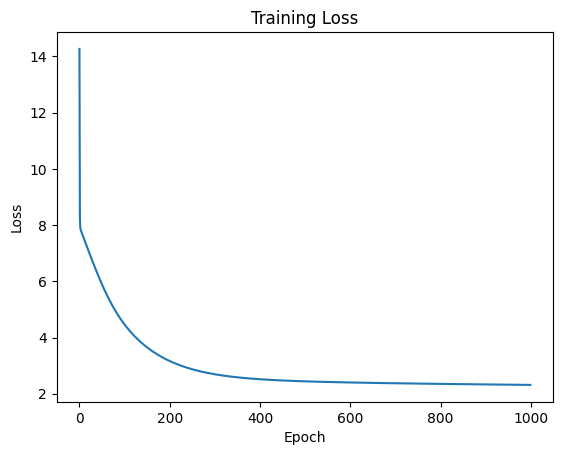

In [17]:

# Plot the loss
import matplotlib.pyplot as plt

hidden_layer_size = 3
learning_rate = 0.01
n_splits = 5

model = NN(input_layer_size=X_data.shape[1], hidden_layer_size=hidden_layer_size, output_layer_size=1, lr=learning_rate, epoches=1000)
loss = model.train(X_data, y_data.reshape(-1, 1))

plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
